# Hypnic jerk

A hypnic jerk is a medical designation for that sensation of falling you may have experience while sleeping or about to fall asleep.

Here we use a modified version of the Stokes Sinker to illustrate periodic boundary conditions. The Model is set to be periodic in the vertical direction. The results is that the Sphere will continue to fall forever. Hypnic jerk...

In [1]:
import UWGeodynamics as GEO

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
velocity = 1.0 * u.centimeter / u.hour
model_length = 2. * u.meter
model_height = 1. * u.meter
refViscosity = 1e6 * u.pascal * u.second
bodyforce = 200 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_height
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [4]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(-1. * u.meter, -50. * u.centimeter), 
                  maxCoord=(1. * u.meter, 50. * u.centimeter),
                  periodic=[False, True])

In [5]:
lightMaterial = Model.add_material(name="Light", shape=GEO.shapes.Layer2D(top=Model.top, bottom=Model.bottom))
heavyMaterial = Model.add_material(name="Heavy", shape=GEO.shapes.Disk(center=(0.,30.*u.centimetre), radius=10. * u.centimetre))

In [6]:
lightMaterial.density = 10 * u.kilogram / u.metre**3
heavyMaterial.density = 500 * u.kilogram / u.metre**3

lightMaterial.viscosity = GEO.ConstantViscosity(1e6 * u.pascal * u.second)
heavyMaterial.viscosity = GEO.ConstantViscosity(1e6 * u.pascal * u.second)

In [7]:
Model.set_velocityBCs(left=[0, 0], right=[0, 0])


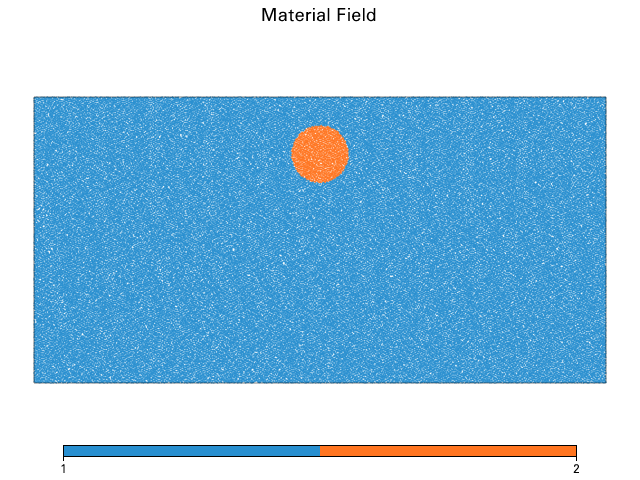

In [8]:
Fig = Model.plot.material(projected=False, fn_size=2.0)

In [9]:
Model.init_model()

In [10]:
Model.run_for(3.0 * u.hours, checkpoint_interval=5.0 * u.minutes)

Running with UWGeodynamics version 0.9.3-dev-7ed5961(development)
Step:1 Model Time:  0.008242810141747766 hour dt: 0.008242810141747766 hour (2018-10-25 05:04:23)
Step:2 Model Time:  0.016518772789010278 hour dt: 0.008275962647262512 hour (2018-10-25 05:04:24)
Step:3 Model Time:  0.0247889047200596 hour dt: 0.008270131931049321 hour (2018-10-25 05:04:25)
Step:4 Model Time:  0.033092706042955077 hour dt: 0.008303801322895477 hour (2018-10-25 05:04:27)
Step:5 Model Time:  0.04134952621156423 hour dt: 0.008256820168609152 hour (2018-10-25 05:04:28)
Step:6 Model Time:  0.049635824984594124 hour dt: 0.008286298773029893 hour (2018-10-25 05:04:29)
Step:7 Model Time:  0.0579038653793926 hour dt: 0.008268040394798476 hour (2018-10-25 05:04:30)
Step:8 Model Time:  0.06620350252988219 hour dt: 0.008299637150489583 hour (2018-10-25 05:04:32)
Step:9 Model Time:  0.07448634325292844 hour dt: 0.00828284072304624 hour (2018-10-25 05:04:33)
Step:10 Model Time:  0.08276984233309116 hour dt: 0.00828349

Step:85 Model Time:  0.6496842065804123 hour dt: 0.008274808557159431 hour (2018-10-25 05:06:29)
Step:86 Model Time:  0.6579897034490266 hour dt: 0.008305496868614379 hour (2018-10-25 05:06:30)
Step:87 Model Time:  0.6662661813230998 hour dt: 0.008276477874073167 hour (2018-10-25 05:06:31)
Step:88 Model Time:  0.6666666666666662 hour dt: 0.0004004853435664313 hour (2018-10-25 05:06:34)
Step:89 Model Time:  0.6750135173771691 hour dt: 0.008346850710502849 hour (2018-10-25 05:06:35)
Step:90 Model Time:  0.6832944508144592 hour dt: 0.008280933437290059 hour (2018-10-25 05:06:37)
Step:91 Model Time:  0.6915889311945972 hour dt: 0.008294480380137987 hour (2018-10-25 05:06:38)
Step:92 Model Time:  0.6998848241711864 hour dt: 0.00829589297658919 hour (2018-10-25 05:06:39)
Step:93 Model Time:  0.7082199689385682 hour dt: 0.008335144767381864 hour (2018-10-25 05:06:41)
Step:94 Model Time:  0.7165179025515203 hour dt: 0.008297933612951999 hour (2018-10-25 05:06:42)
Step:95 Model Time:  0.7248377

Step:170 Model Time:  1.3333333333333315 hour dt: 0.00820746800251123 hour (2018-10-25 05:08:39)
Step:171 Model Time:  1.3416800707724252 hour dt: 0.008346737439093725 hour (2018-10-25 05:08:41)
Step:172 Model Time:  1.3500190711099482 hour dt: 0.008339000337522863 hour (2018-10-25 05:08:42)
Step:173 Model Time:  1.3583231223200565 hour dt: 0.008304051210108354 hour (2018-10-25 05:08:44)
Step:174 Model Time:  1.366665555280211 hour dt: 0.008342432960154404 hour (2018-10-25 05:08:45)
Step:175 Model Time:  1.3750031001009522 hour dt: 0.008337544820741038 hour (2018-10-25 05:08:46)
Step:176 Model Time:  1.3833038219131488 hour dt: 0.008300721812196613 hour (2018-10-25 05:08:48)
Step:177 Model Time:  1.3916271234813222 hour dt: 0.008323301568173626 hour (2018-10-25 05:08:49)
Step:178 Model Time:  1.3999823838233063 hour dt: 0.008355260341983927 hour (2018-10-25 05:08:51)
Step:179 Model Time:  1.4083493214546434 hour dt: 0.008366937631337208 hour (2018-10-25 05:08:52)
Step:180 Model Time:  

Step:254 Model Time:  1.974847329372495 hour dt: 0.008317595875844606 hour (2018-10-25 05:10:54)
Step:255 Model Time:  1.9831292668760117 hour dt: 0.00828193750351638 hour (2018-10-25 05:10:55)
Step:256 Model Time:  1.9914306889460007 hour dt: 0.008301422069989118 hour (2018-10-25 05:10:57)
Step:257 Model Time:  1.9997723070716535 hour dt: 0.00834161812565283 hour (2018-10-25 05:10:58)
Step:258 Model Time:  1.9999999999999993 hour dt: 0.00022769292834581845 hour (2018-10-25 05:11:01)
Step:259 Model Time:  2.0083489327364052 hour dt: 0.008348932736405959 hour (2018-10-25 05:11:03)
Step:260 Model Time:  2.016628803963989 hour dt: 0.008279871227583667 hour (2018-10-25 05:11:04)
Step:261 Model Time:  2.0249402405128922 hour dt: 0.008311436548903284 hour (2018-10-25 05:11:05)
Step:262 Model Time:  2.0333008805956405 hour dt: 0.008360640082748408 hour (2018-10-25 05:11:07)
Step:263 Model Time:  2.041638098665091 hour dt: 0.008337218069450179 hour (2018-10-25 05:11:08)
Step:264 Model Time:  2

Step:338 Model Time:  2.641556839813369 hour dt: 0.008286815538697995 hour (2018-10-25 05:13:08)
Step:339 Model Time:  2.649899016637661 hour dt: 0.008342176824291798 hour (2018-10-25 05:13:10)
Step:340 Model Time:  2.658193593904371 hour dt: 0.008294577266709997 hour (2018-10-25 05:13:11)
Step:341 Model Time:  2.66648342029053 hour dt: 0.008289826386158912 hour (2018-10-25 05:13:13)
Step:342 Model Time:  2.6666666666666647 hour dt: 0.00018324637613489902 hour (2018-10-25 05:13:16)
Step:343 Model Time:  2.674961350425444 hour dt: 0.008294683758779302 hour (2018-10-25 05:13:17)
Step:344 Model Time:  2.683283202981479 hour dt: 0.008321852556035023 hour (2018-10-25 05:13:19)
Step:345 Model Time:  2.69156622988242 hour dt: 0.008283026900941534 hour (2018-10-25 05:13:20)
Step:346 Model Time:  2.699870762327861 hour dt: 0.008304532445440903 hour (2018-10-25 05:13:22)
Step:347 Model Time:  2.7081394128762986 hour dt: 0.008268650548437464 hour (2018-10-25 05:13:23)
Step:348 Model Time:  2.7164

1


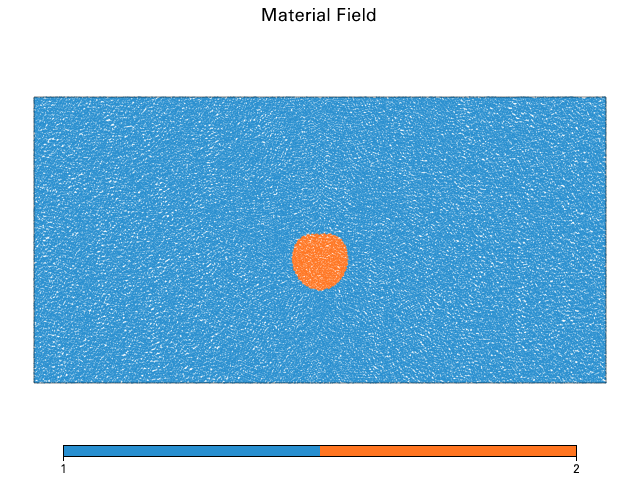

In [11]:
Fig = Model.plot.material(projected=False, fn_size=2.0)


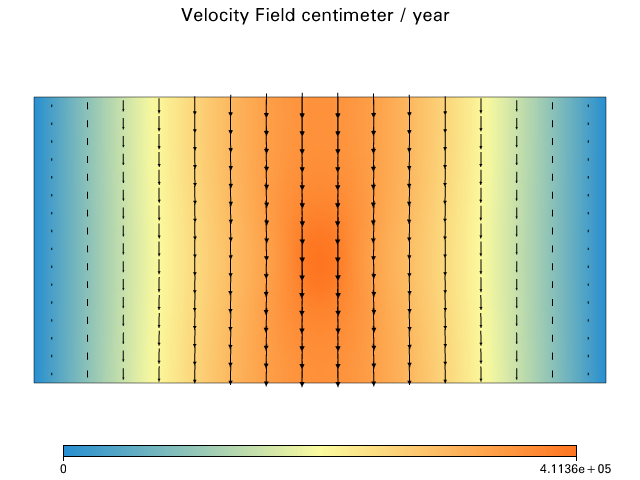

In [12]:
Fig = Model.plot.velocityField()


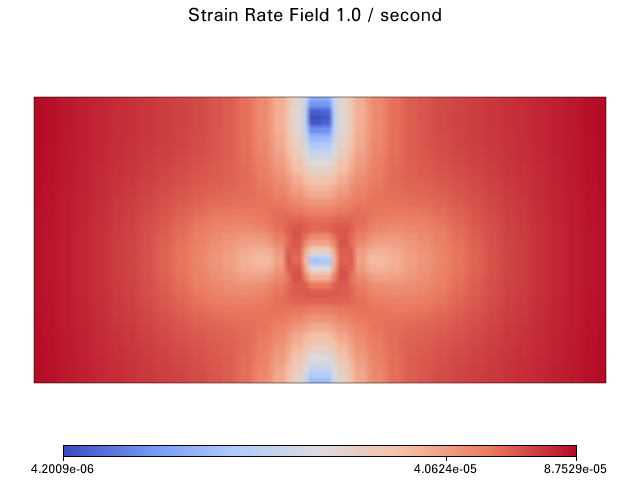

In [13]:
Fig = Model.plot.strainRate()